In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

617

In [6]:
# Import the datetime module from the datetime library.
from datetime import datetime
import requests 
# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)



http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=82bac096f36fb4870bf8d6e6f8c04c3a


In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city = cities[i]
    city_url = url + "&q=" + city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    

Processing Record 1 of Set 1 | geraldton
Processing Record 1 of Set 1 | rijssen
Processing Record 1 of Set 1 | vaitupu
Processing Record 1 of Set 1 | sao filipe
Processing Record 1 of Set 1 | huilong
Processing Record 1 of Set 1 | rikitea
Processing Record 1 of Set 1 | ushuaia
Processing Record 1 of Set 1 | bredasdorp
Processing Record 1 of Set 1 | kapaa
Processing Record 1 of Set 1 | saskylakh
Processing Record 1 of Set 1 | arcachon
Processing Record 1 of Set 1 | broome
Processing Record 1 of Set 1 | severo-kurilsk
Processing Record 1 of Set 1 | brae
Processing Record 1 of Set 1 | alihe
Processing Record 1 of Set 1 | guozhen
Processing Record 1 of Set 1 | ancud
Processing Record 1 of Set 1 | morondava
Processing Record 1 of Set 1 | zaritap
Processing Record 1 of Set 1 | sur
Processing Record 1 of Set 1 | hasaki
Processing Record 1 of Set 1 | hamilton
Processing Record 1 of Set 1 | qaanaaq
Processing Record 1 of Set 1 | kangaatsiaq
Processing Record 1 of Set 1 | mataura
Processing Reco

In [10]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | geraldton
Processing Record 2 of Set 13 | rijssen
Processing Record 3 of Set 13 | vaitupu
City not found. Skipping...
Processing Record 4 of Set 13 | sao filipe
Processing Record 5 of Set 13 | huilong
Processing Record 6 of Set 13 | rikitea
Processing Record 7 of Set 13 | ushuaia
Processing Record 8 of Set 13 | bredasdorp
Processing Record 9 of Set 13 | kapaa
Processing Record 10 of Set 13 | saskylakh
Processing Record 11 of Set 13 | arcachon
Processing Record 12 of Set 13 | broome
Processing Record 13 of Set 13 | severo-kurilsk
Processing Record 14 of Set 13 | brae
Processing Record 15 of Set 13 | alihe
Processing Record 16 of Set 13 | guozhen
Processing Record 17 of Set 13 | ancud
Processing Record 18 of Set 13 | morondava
Processing Record 19 of Set 13 | zaritap
Processing Record 20 of Set 13 | sur
Processing Record 21 of Set 13 | hasaki
Processing Record 22 of Set 13 | hamilton
Processing Record 23 of Set 13 | qaanaaq
Processing Record 24 of Set 13 |

Processing Record 35 of Set 16 | constitucion
Processing Record 36 of Set 16 | pyay
Processing Record 37 of Set 16 | hirara
Processing Record 38 of Set 16 | saravan
Processing Record 39 of Set 16 | kitgum
Processing Record 40 of Set 16 | hofn
Processing Record 41 of Set 16 | kununurra
Processing Record 42 of Set 16 | kaeo
Processing Record 43 of Set 16 | butaritari
Processing Record 44 of Set 16 | pangody
Processing Record 45 of Set 16 | soanierana ivongo
Processing Record 46 of Set 16 | airai
Processing Record 47 of Set 16 | asau
City not found. Skipping...
Processing Record 48 of Set 16 | sao joao da barra
Processing Record 49 of Set 16 | pisco
Processing Record 50 of Set 16 | guerrero negro
Processing Record 1 of Set 17 | kango
Processing Record 2 of Set 17 | barrow
Processing Record 3 of Set 17 | banda aceh
Processing Record 4 of Set 17 | la ronge
Processing Record 5 of Set 17 | xianshuigu
Processing Record 6 of Set 17 | nanortalik
Processing Record 7 of Set 17 | almaznyy
Processin

City not found. Skipping...
Processing Record 20 of Set 20 | kamenskoye
City not found. Skipping...
Processing Record 21 of Set 20 | attawapiskat
City not found. Skipping...
Processing Record 22 of Set 20 | sulurpeta
City not found. Skipping...
Processing Record 23 of Set 20 | gat
Processing Record 24 of Set 20 | vestmannaeyjar
Processing Record 25 of Set 20 | samarai
Processing Record 26 of Set 20 | karaul
City not found. Skipping...
Processing Record 27 of Set 20 | naze
Processing Record 28 of Set 20 | livani
Processing Record 29 of Set 20 | puerto barrios
Processing Record 30 of Set 20 | kavieng
Processing Record 31 of Set 20 | chermoz
Processing Record 32 of Set 20 | meulaboh
Processing Record 33 of Set 20 | tateyama
Processing Record 34 of Set 20 | kemijarvi
City not found. Skipping...
Processing Record 35 of Set 20 | tura
Processing Record 36 of Set 20 | ekimchan
Processing Record 37 of Set 20 | senj
Processing Record 38 of Set 20 | kribi
Processing Record 39 of Set 20 | eregli
P

Processing Record 48 of Set 23 | lasa
Processing Record 49 of Set 23 | verkhnyaya inta
Processing Record 50 of Set 23 | mirpur sakro
Processing Record 1 of Set 24 | san cristobal
Processing Record 2 of Set 24 | sirnak
Processing Record 3 of Set 24 | churapcha
Processing Record 4 of Set 24 | the valley
Processing Record 5 of Set 24 | anadyr
Processing Record 6 of Set 24 | havelock
Processing Record 7 of Set 24 | liverpool
Processing Record 8 of Set 24 | kortkeros
Processing Record 9 of Set 24 | lagoa
Processing Record 10 of Set 24 | jabiru
City not found. Skipping...
Processing Record 11 of Set 24 | bengkulu
City not found. Skipping...
Processing Record 12 of Set 24 | teknaf
Processing Record 13 of Set 24 | lompoc
Processing Record 14 of Set 24 | da nang
City not found. Skipping...
Processing Record 15 of Set 24 | bay roberts
Processing Record 16 of Set 24 | chengam
Processing Record 17 of Set 24 | mvuma
Processing Record 18 of Set 24 | ulagan
Processing Record 19 of Set 24 | emba
Proce

In [11]:
len(city_data)

552

In [12]:
city_data

[{'City': 'Geraldton',
  'Lat': 49.72,
  'Lng': -86.95,
  'Max Temp': 15.8,
  'Humidity': 78,
  'Cloudiness': 90,
  'Wind Speed': 10.29,
  'Country': 'CA',
  'Date': '2020-01-04 22:55:03'},
 {'City': 'Rijssen',
  'Lat': 52.31,
  'Lng': 6.52,
  'Max Temp': 46,
  'Humidity': 100,
  'Cloudiness': 90,
  'Wind Speed': 2.24,
  'Country': 'NL',
  'Date': '2020-01-04 22:55:03'},
 {'City': 'Sao Filipe',
  'Lat': 14.9,
  'Lng': -24.5,
  'Max Temp': 70.2,
  'Humidity': 76,
  'Cloudiness': 20,
  'Wind Speed': 14.07,
  'Country': 'CV',
  'Date': '2020-01-04 22:52:21'},
 {'City': 'Huilong',
  'Lat': 31.15,
  'Lng': 106.5,
  'Max Temp': 47.34,
  'Humidity': 85,
  'Cloudiness': 100,
  'Wind Speed': 1.99,
  'Country': 'CN',
  'Date': '2020-01-04 22:55:03'},
 {'City': 'Rikitea',
  'Lat': -23.12,
  'Lng': -134.97,
  'Max Temp': 77.09,
  'Humidity': 75,
  'Cloudiness': 71,
  'Wind Speed': 16.78,
  'Country': 'PF',
  'Date': '2020-01-04 22:54:05'},
 {'City': 'Ushuaia',
  'Lat': -54.81,
  'Lng': -68.31,
  '

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Geraldton,49.72,-86.95,15.80,78,90,10.29,CA,2020-01-04 22:55:03
1,Rijssen,52.31,6.52,46.00,100,90,2.24,NL,2020-01-04 22:55:03
2,Sao Filipe,14.90,-24.50,70.20,76,20,14.07,CV,2020-01-04 22:52:21
3,Huilong,31.15,106.50,47.34,85,100,1.99,CN,2020-01-04 22:55:03
4,Rikitea,-23.12,-134.97,77.09,75,71,16.78,PF,2020-01-04 22:54:05
5,Ushuaia,-54.81,-68.31,57.20,84,40,8.05,AR,2020-01-04 22:54:03
6,Bredasdorp,-34.53,20.04,64.40,72,55,4.70,ZA,2020-01-04 22:55:04
7,Kapaa,22.08,-159.32,80.60,78,90,23.04,US,2020-01-04 22:55:05
8,Saskylakh,71.97,114.09,-20.27,96,49,6.51,RU,2020-01-04 22:55:05
9,Arcachon,44.65,-1.18,37.40,100,15,3.36,FR,2020-01-04 22:55:05


In [14]:
new_column_order = ["City", 'Country', 'Date', 'Lat','Lng', 'Max Temp','Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Geraldton,CA,2020-01-04 22:55:03,49.72,-86.95,15.80,78,90,10.29
1,Rijssen,NL,2020-01-04 22:55:03,52.31,6.52,46.00,100,90,2.24
2,Sao Filipe,CV,2020-01-04 22:52:21,14.90,-24.50,70.20,76,20,14.07
3,Huilong,CN,2020-01-04 22:55:03,31.15,106.50,47.34,85,100,1.99
4,Rikitea,PF,2020-01-04 22:54:05,-23.12,-134.97,77.09,75,71,16.78
...,...,...,...,...,...,...,...,...,...
547,Ngunguru,NZ,2020-01-04 22:57:50,-35.62,174.50,72.00,59,88,8.99
548,Jintur,IN,2020-01-04 22:57:50,19.61,76.69,61.18,75,0,7.34
549,Tarija,BO,2020-01-04 22:57:50,-21.53,-64.73,73.40,53,75,5.82
550,Coihaique,CL,2020-01-04 22:53:35,-45.58,-72.07,59.00,44,40,10.29


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")  
#

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [19]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1578180671.9873629

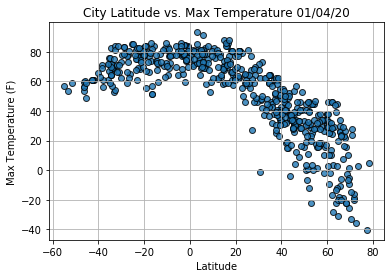

In [21]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()



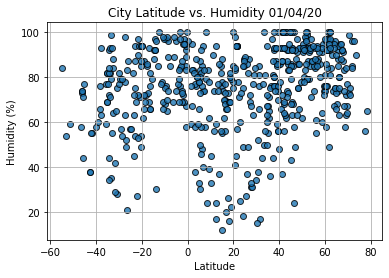

In [23]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

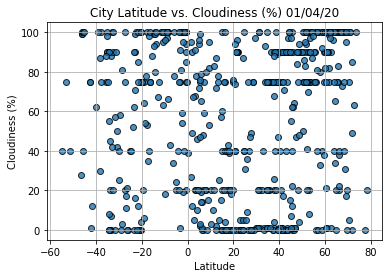

In [24]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

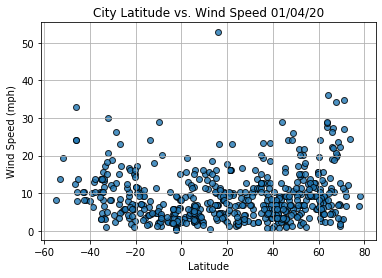

In [25]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()